# Visualizing Data in Python

When working with a new dataset, one of the most useful things to do is to begin to visualize the data. By using **tables**, **histograms**, **boxplots**, **scatter plots** and other visual tools, we can get a better idea of what the data may be trying to tell us, and we can gain insights into the data that we may have not discovered otherwise.

In this notebook will use the [Seaborn](https://seaborn.pydata.org/) data processing library, which is a higher-level interface to **Matplotlib** that can be used to simplify many visualization tasks

The **Seaborn** provides visualisations tools that will allow to explore data from a graphical perspective.


## Acknowledgments

- Data from https://www.coursera.org/ from the course "Understanding and Visualizing Data with Python" by University of Michigan

# Importing libraries

In [6]:
# Import the packages that we will be using
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Importing data

In [2]:
# Definir si se ejecuta en Google Colab o localmente
RunInColab = True  # (False: no  | True: sí)

# Si se ejecuta en Google Colab:
if RunInColab:
    from google.colab import drive
    drive.mount('/content/drive')

    # Definir la ruta del archivo en la carpeta NotebooksProfessor
    Ruta = "/content/drive/My Drive/NotebooksProfessor/"

else:
    # Si se ejecuta localmente, definir la ruta donde se encuentra el archivo
    Ruta = ""

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
# url string that hosts our .csv file
url = Ruta + "cartwheel.csv"

# Read the .csv file and store it as a pandas Data Frame
df_car = pd.read_csv(url)

# Exploring the content of the data set

Get a general 'feel' of the data


In [10]:
# Mostrar las primeras 5 filas del dataset para obtener una visión general
print("Primeras filas del dataset:")
print(df_car.head())

# Información del dataset: muestra el tipo de datos de cada columna y la cantidad de valores no nulos
print("\nInformación del dataset:")
print(df_car.info())

# Resumen estadístico de las variables cuantitativas (min, max, media, etc.)
print("\nResumen estadístico de las variables cuantitativas:")
print(df_car.describe())

# Verificar si hay valores nulos en el dataset
print("\nCantidad de valores nulos en cada columna:")
print(df_car.isnull().sum())

# Número de filas y columnas en el dataset
print("\nNúmero total de filas y columnas:")
print(df_car.shape)

# Ver los nombres de las columnas
print("\nNombres de las columnas:")
print(df_car.columns)


Primeras filas del dataset:
   ID   Age Gender  GenderGroup Glasses  GlassesGroup  Height  Wingspan  \
0   1  56.0      F            1       Y             1    62.0      61.0   
1   2  26.0      F            1       Y             1    62.0      60.0   
2   3  33.0      F            1       Y             1    66.0      64.0   
3   4  39.0      F            1       N             0    64.0      63.0   
4   5  27.0      M            2       N             0    73.0      75.0   

   CWDistance Complete  CompleteGroup  Score  
0          79        Y            1.0      7  
1          70        Y            1.0      8  
2          85        Y            1.0      7  
3          87        Y            1.0     10  
4          72        N            0.0      4  

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             52

# Frequency tables

The `value_counts()` method can be used to determine the number of times that each distinct value of a variable occurs in a data set.  In statistical terms, this is the "frequency distribution" of the variable. The `value_counts()` method produces a table with two columns.  The first column contains all distinct observed values for the variable.  The second column contains the number of times each of these values occurs.  Note that the table returned by `value_counts()` is actually a **Pandas** data frame, so can be further processed using any Pandas methods for working with data frames.


In [19]:
# Number of times that each distinct value of a variable occurs in a data set
print("\nNúmero de veces que cada valor distinto de 'Gender' ocurre en el dataset:")
print(df_car['Gender'].value_counts())



Número de veces que cada valor distinto de 'Gender' ocurre en el dataset:
Gender
F    26
M    26
Name: count, dtype: int64


In [20]:
# Proportion of each distinct value of a variable occurs in a data set
print("\nProporción de cada valor distinto de 'Gender' en el dataset:")
print(df_car['Gender'].value_counts(normalize=True))



Proporción de cada valor distinto de 'Gender' en el dataset:
Gender
F    0.5
M    0.5
Name: proportion, dtype: float64


Note that the `value_counts()` method excludes missing values. We confirm this below by adding up observations to your data frame with some missing values and then computing `value_counts()` and comparing this to the total number of rows in the data set, which is 28. This tells us that there are 28 - (21+6) = 1 missing values for this variable (other variables may have different numbers of missing values).

In [22]:
# Total number of observations

total_observations = df_car.shape[0]
print("\nNúmero total de observaciones (filas):", total_observations)

# total number of null observations in Age

null_age = df_car['Age'].isnull().sum()
print("\nNúmero total de observaciones nulas en 'Age':", null_age)


# Total number of counts in Age (excluding missing values)

age_counts = df_car['Age'].dropna().count()
print("\nNúmero total de observaciones en 'Age' (excluyendo los valores nulos):", age_counts)



Número total de observaciones (filas): 52

Número total de observaciones nulas en 'Age': 1

Número total de observaciones en 'Age' (excluyendo los valores nulos): 51


# Histogram

It is often good to get a feel for the shape of the distribution of the data.

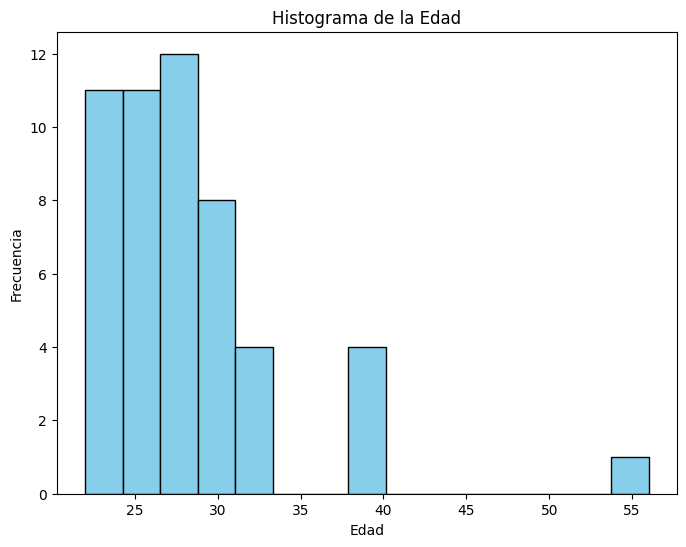

In [23]:
# Plot histogram of Age

plt.figure(figsize=(8, 6))
plt.hist(df_car['Age'].dropna(), bins=15, color='skyblue', edgecolor='black')
plt.title('Histograma de la Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

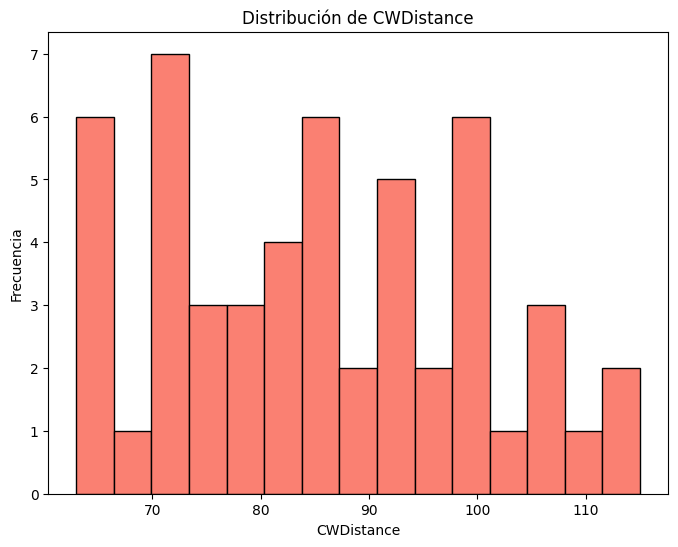

In [24]:
# Plot distribution of CWDistance

plt.figure(figsize=(8, 6))
plt.hist(df_car['CWDistance'].dropna(), bins=15, color='salmon', edgecolor='black')
plt.title('Distribución de CWDistance')
plt.xlabel('CWDistance')
plt.ylabel('Frecuencia')
plt.show()

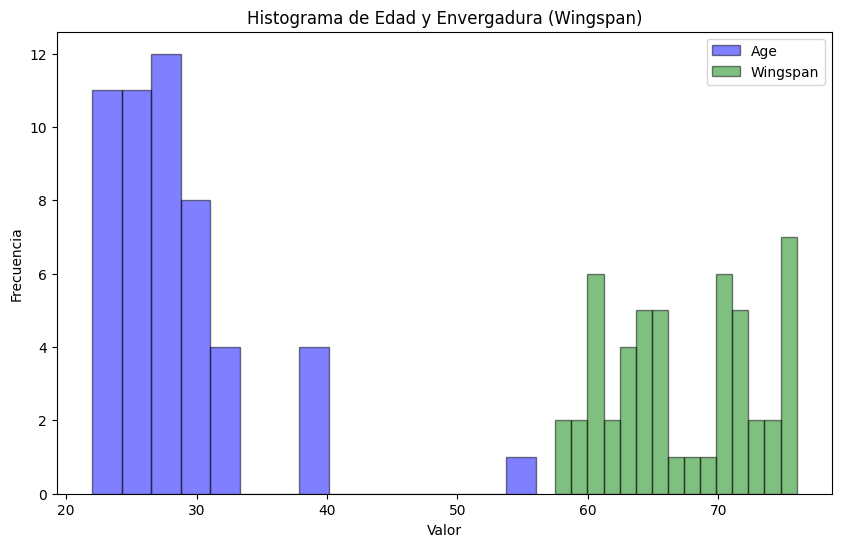

In [25]:
# Plot histogram of both the Age and the Wingspan

plt.figure(figsize=(10, 6))

# Histograma de Age
plt.hist(df_car['Age'].dropna(), bins=15, alpha=0.5, label='Age', color='blue', edgecolor='black')

# Histograma de Wingspan
plt.hist(df_car['Wingspan'].dropna(), bins=15, alpha=0.5, label='Wingspan', color='green', edgecolor='black')

plt.title('Histograma de Edad y Envergadura (Wingspan)')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

# Histograms plotted by groups

While looking at a single variable is interesting, it is often useful to see how a variable changes in response to another. Thus, we can create a histograms of one quantitative variable grouped by another categorical variables.

# Boxplots

Boxplots do not show the shape of the distribution, but they can give us a better idea about the center and spread of the distribution as well as any potential outliers that may exist. Boxplots and Histograms often complement each other and help an analyst get more information about the data

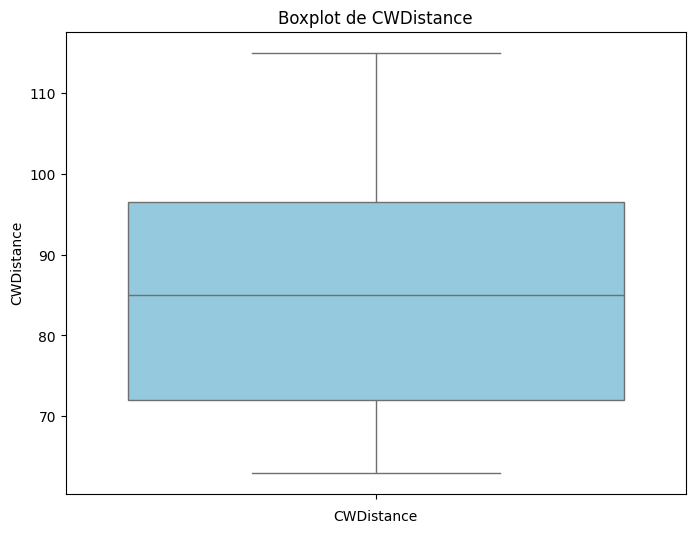

In [26]:
# Create the boxplot of the "CWDistance"

plt.figure(figsize=(8, 6))
sns.boxplot(data=df_car, y='CWDistance', color='skyblue')
plt.title('Boxplot de CWDistance')
plt.xlabel('CWDistance')
plt.show()

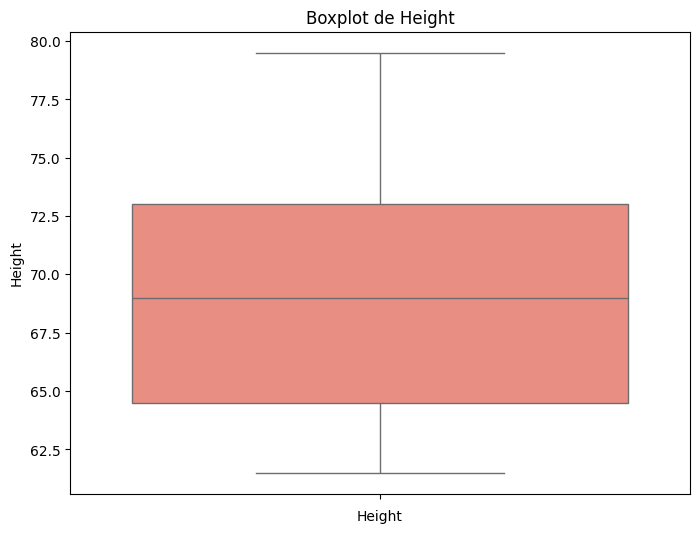

In [27]:
# Create the boxplot of the "Height"

plt.figure(figsize=(8, 6))
sns.boxplot(data=df_car, y='Height', color='salmon')
plt.title('Boxplot de Height')
plt.xlabel('Height')
plt.show()

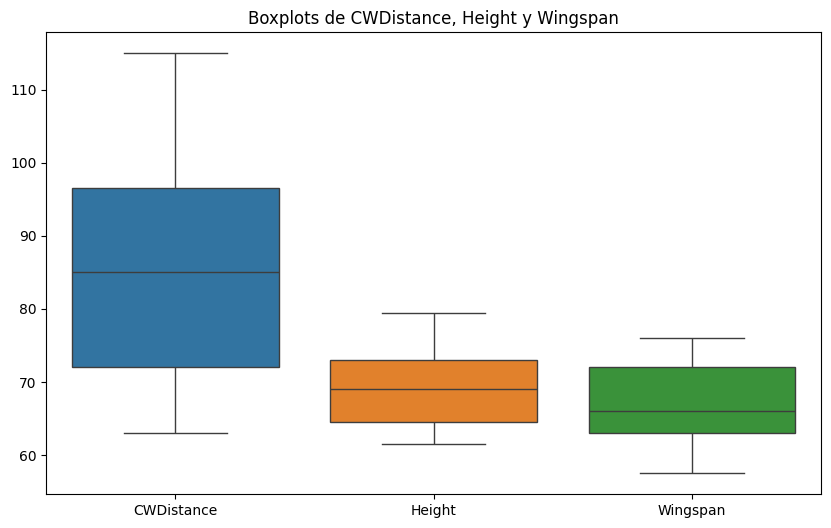

In [28]:
# Create the boxplots of the "CWDistance", "Height" and "Wingspan"

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_car[['CWDistance', 'Height', 'Wingspan']])
plt.title('Boxplots de CWDistance, Height y Wingspan')
plt.show()

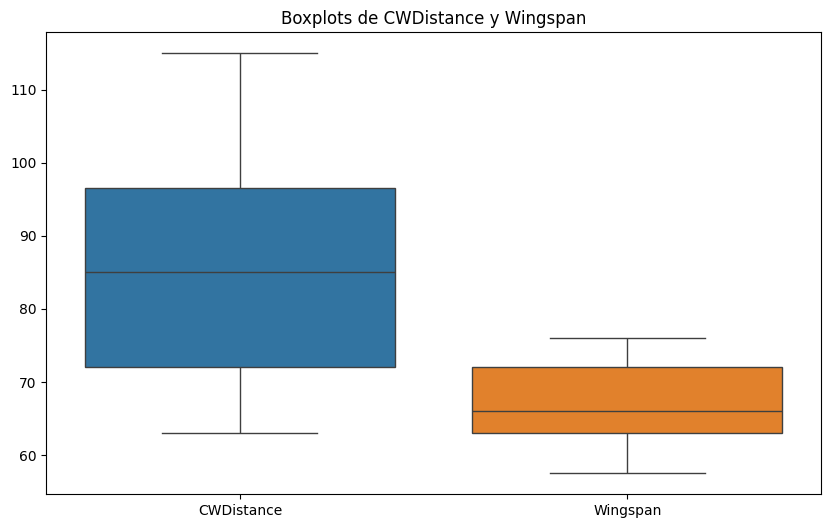

In [29]:
# Create the boxplots of the "CWDistance" and of the "Wingspan"

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_car[['CWDistance', 'Wingspan']])
plt.title('Boxplots de CWDistance y Wingspan')
plt.show()

# Boxplots plotted by groups

While looking at a single variable is interesting, it is often useful to see how a variable changes in response to another. Thus, we can create a side-by-side boxplots of one quantitative variable grouped by another categorical variables.

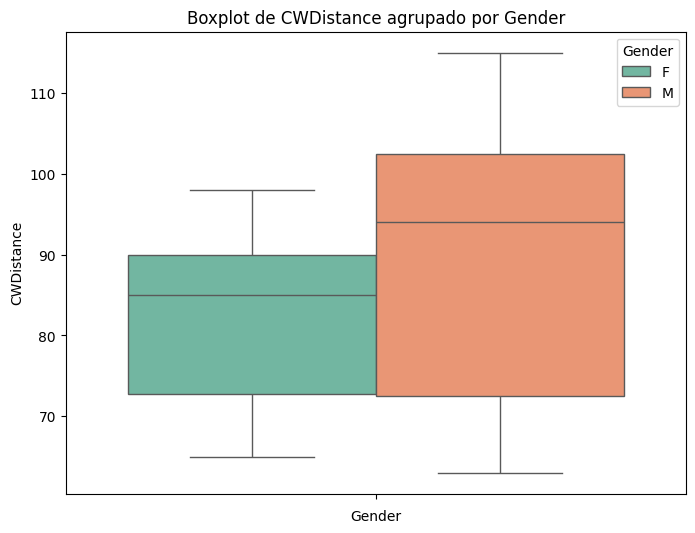

In [30]:
# Create side-by-side boxplots of the "CWDistance" grouped by "Gender"
#sns.boxplot(data=df, y='CWDistance', hue='Gender', gap=.4)

plt.figure(figsize=(8, 6))
sns.boxplot(data=df_car, y='CWDistance', hue='Gender', palette='Set2')
plt.title('Boxplot de CWDistance agrupado por Gender')
plt.xlabel('Gender')
plt.ylabel('CWDistance')
plt.show()

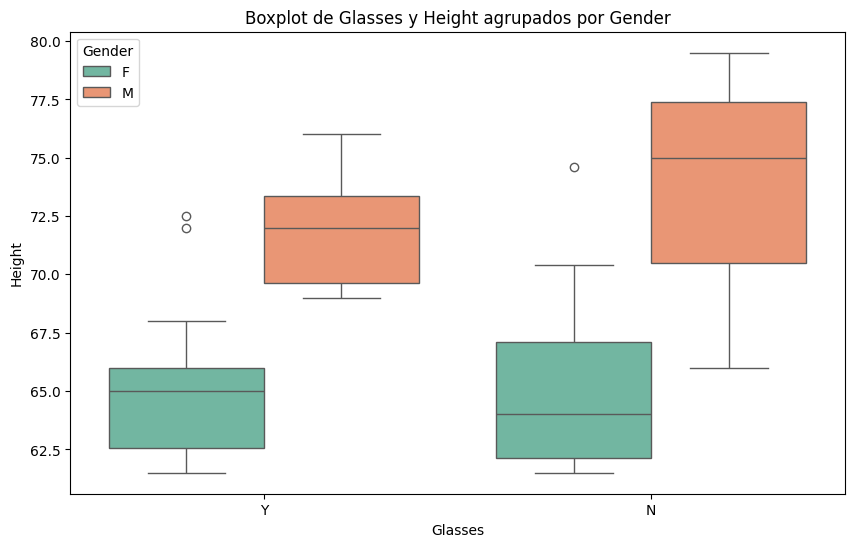

In [31]:
# Create side-by-side boxplots of the "Glasses" grouped by "Gender"
#sns.boxplot(data=df, x="Glasses", y="Height", hue="Gender")

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_car, x='Glasses', y='Height', hue='Gender', palette='Set2')
plt.title('Boxplot de Glasses y Height agrupados por Gender')
plt.xlabel('Glasses')
plt.ylabel('Height')
plt.show()

# Histograms and boxplots plotted by groups

We cal also create both boxplots and histograms of one quantitative variable grouped by another categorical variables


<ipython-input-33-0139c2add5ad>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_car, x='Gender', y='CWDistance', palette='Set2')


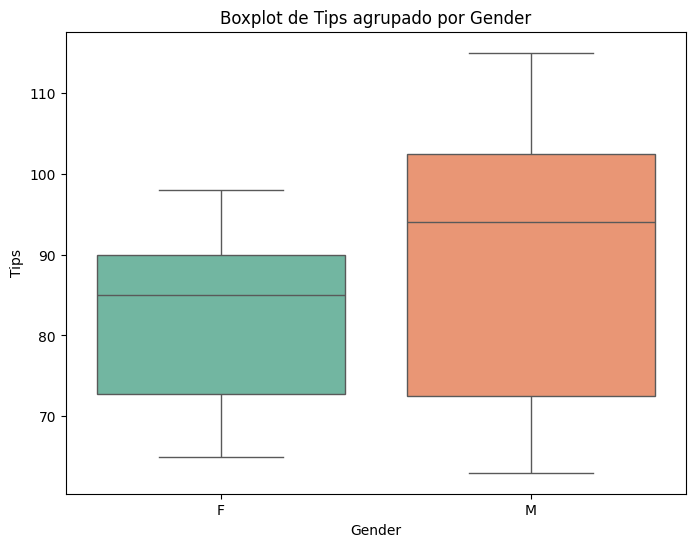

In [33]:
# Create a boxplot and histogram of the "tips" grouped by "Gender"

plt.figure(figsize=(8, 6))
sns.boxplot(data=df_car, x='Gender', y='CWDistance', palette='Set2')
plt.title('Boxplot de Tips agrupado por Gender')
plt.xlabel('Gender')
plt.ylabel('Tips')
plt.show()

# Scatter plot

Plot values of one variable versus another variable to see how they are correlated

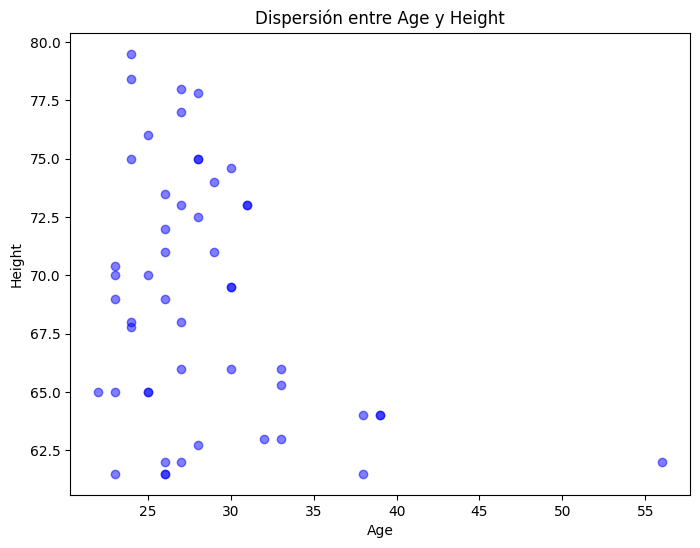

In [41]:
# scatter plot between two variables
plt.figure(figsize=(8, 6))
plt.scatter(df_car['Age'], df_car['Height'], alpha=0.5, color='blue')
plt.title('Dispersión entre Age y Height')
plt.xlabel('Age')
plt.ylabel('Height')
plt.show()

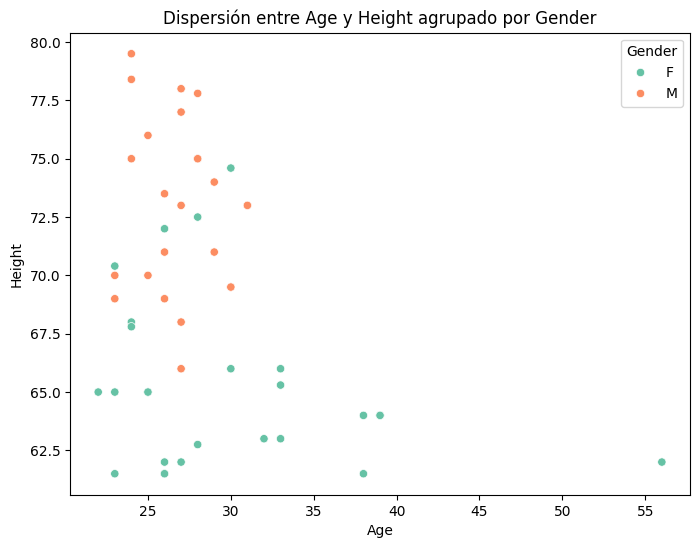

In [42]:
# scatter plot between two variables (one categorical)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_car, x='Age', y='Height', hue='Gender', palette='Set2')
plt.title('Dispersión entre Age y Height agrupado por Gender')
plt.xlabel('Age')
plt.ylabel('Height')
plt.show()


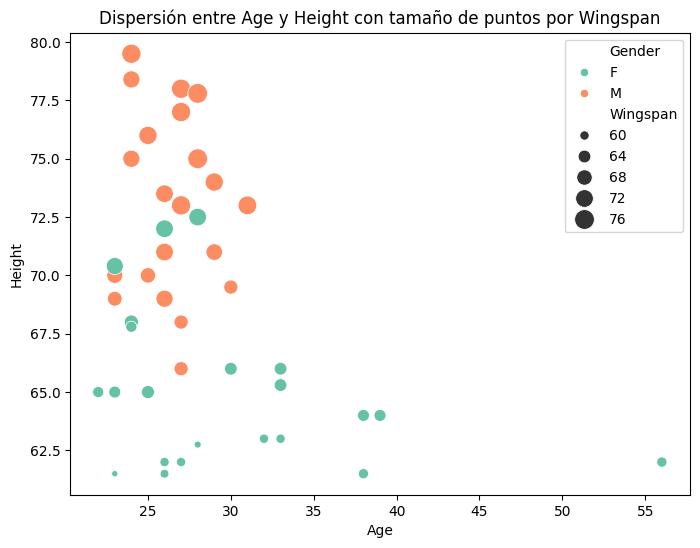

In [45]:
# scatter plot between two variables (one categorical)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_car, x='Age', y='Height', hue='Gender', size='Wingspan', palette='Set2', sizes=(20, 200))
plt.title('Dispersión entre Age y Height con tamaño de puntos por Wingspan')
plt.xlabel('Age')
plt.ylabel('Height')
plt.show()

Text(0.5, 1.0, 'Dispersión entre Age y Height agrupado por Gender')

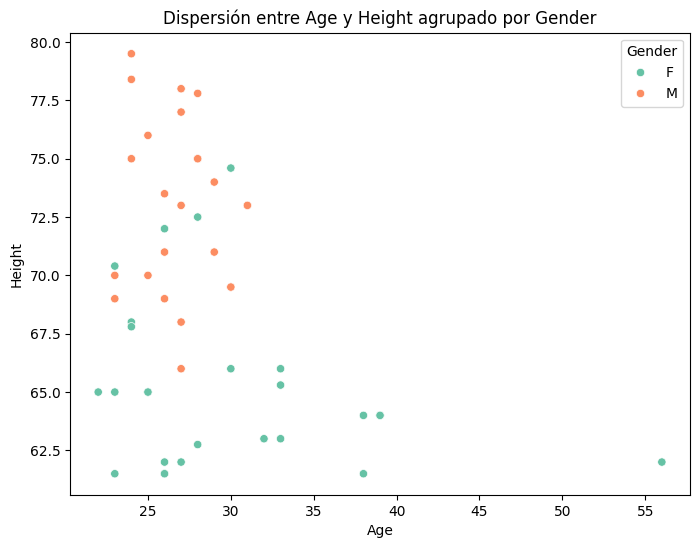

In [51]:
# scatter plot between two variables grouped according to a categorical variable

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_car, x='Age', y='Height', hue='Gender', palette='Set2')
plt.title('Dispersión entre Age y Height agrupado por Gender')


<Axes: xlabel='Age', ylabel='Height'>

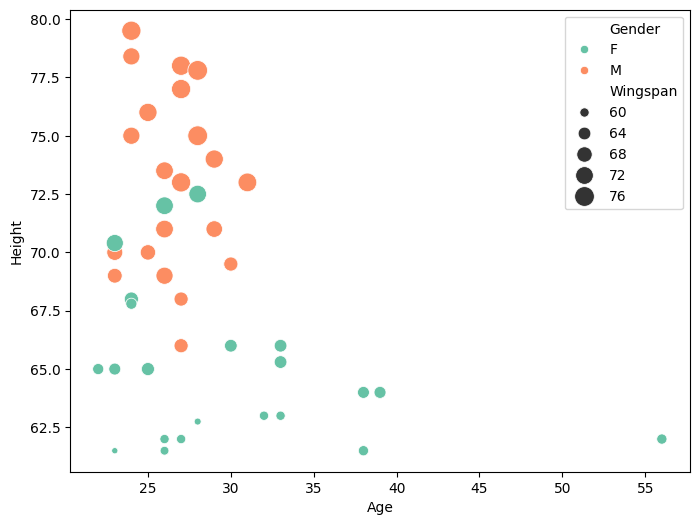

In [53]:
# scatter plot between two variables grouped according to a categorical variable and with size of markers

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_car, x='Age', y='Height', hue='Gender', size='Wingspan', palette='Set2', sizes=(20, 200))


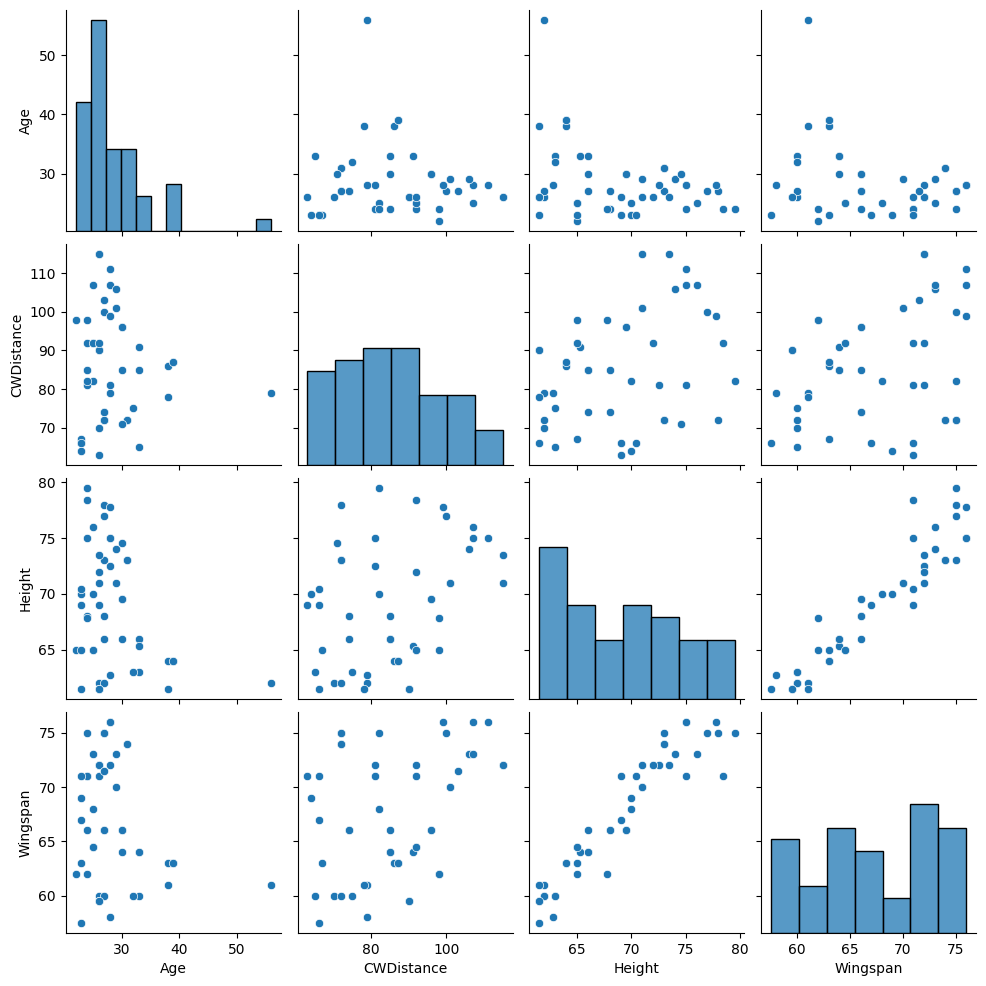

In [52]:
# Pairplot: Scatterplot of "Age","CWDistance","Height",'Wingspan'

sns.pairplot(df_car[['Age', 'CWDistance', 'Height', 'Wingspan']])
plt.show()

# Final remarks


- Visualizing your data using **tables**, **histograms**, **boxplots**, **scatter plots** and other tools is essential to carry put analysis and extract conclusions

- There are several ways to do the same thing

- The **Seaborn** package provides visualisations tools that allow to explore data from a graphical perspective


# Activity: work with the iris dataset

Repeat this tutorial with the iris data set and respond to the following inquiries

1. Plot the histograms for each of the four quantitative variables


2. Plot the histograms for each of the quantitative variables


3. Plot the boxplots for each of the quantitative variables


4. Plot the boxplots of the petal width grouped by type of flower


5. Plot the boxplots of the setal length grouped by type of flower


6. Provide a description (explaination from your observations) of each of the quantitative variables


   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa


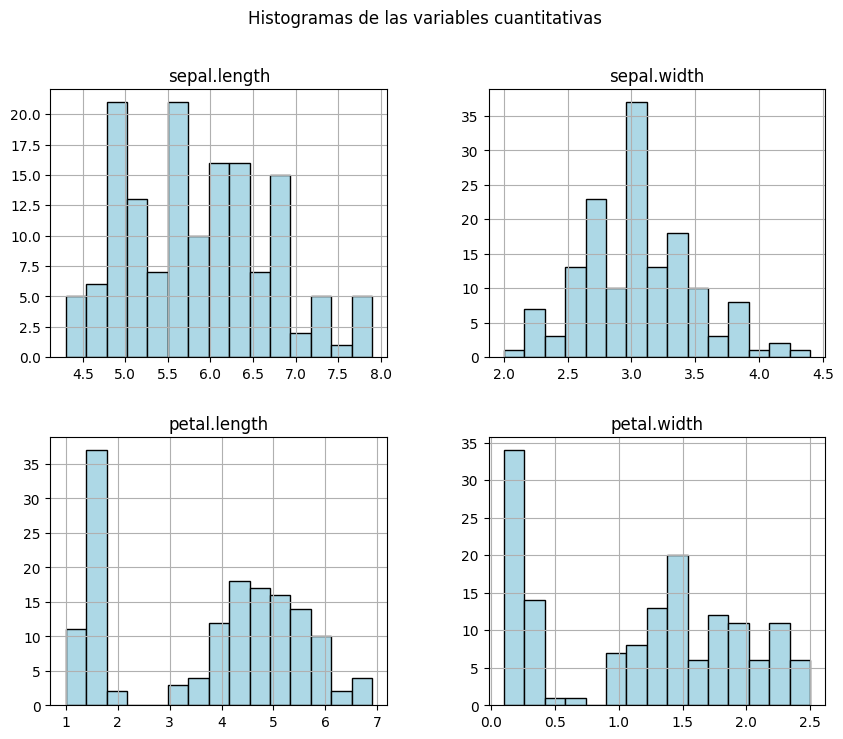

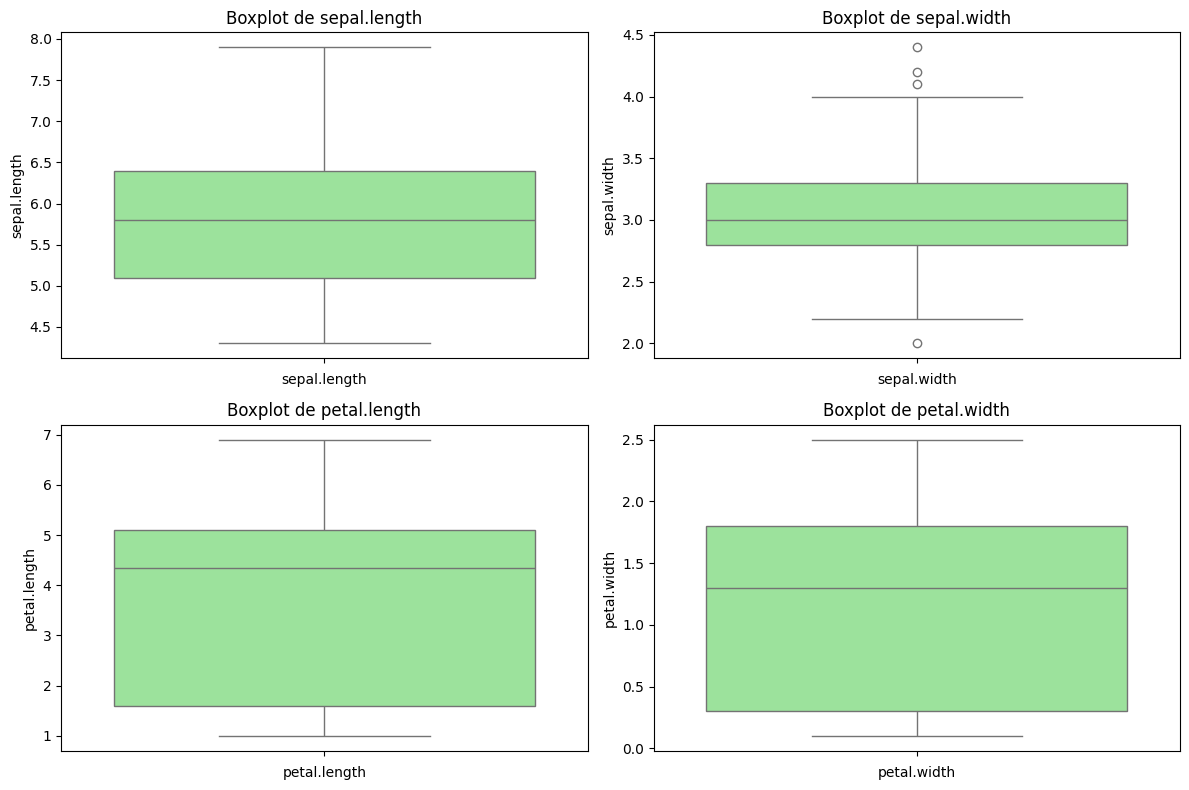

<ipython-input-58-bba045f3f7cd>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_iris, x='variety', y='petal.width', palette='Set2')


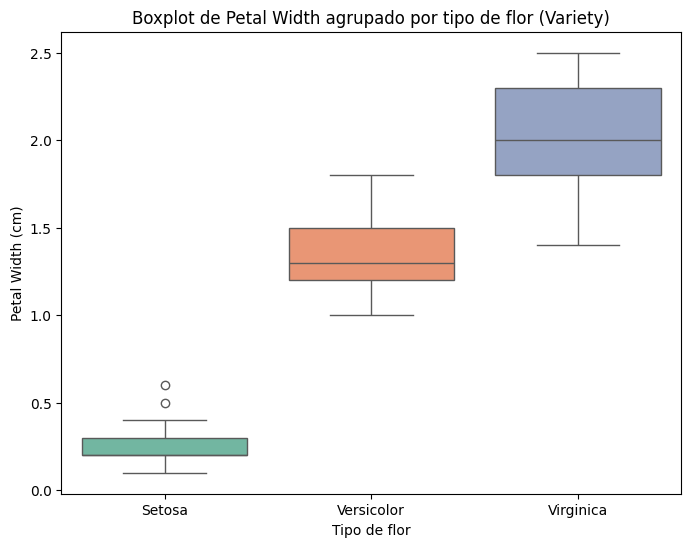

<ipython-input-58-bba045f3f7cd>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_iris, x='variety', y='sepal.length', palette='Set2')


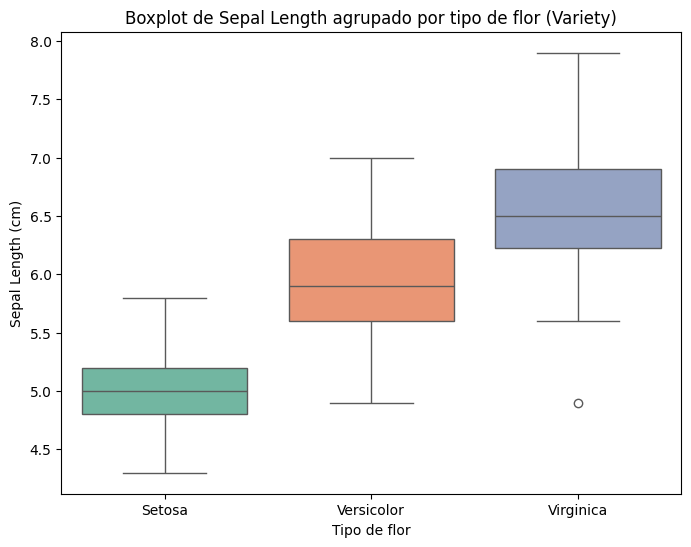

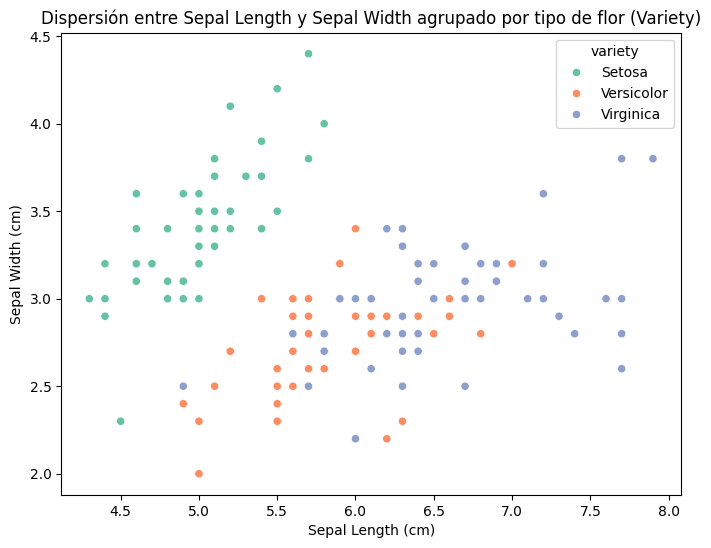

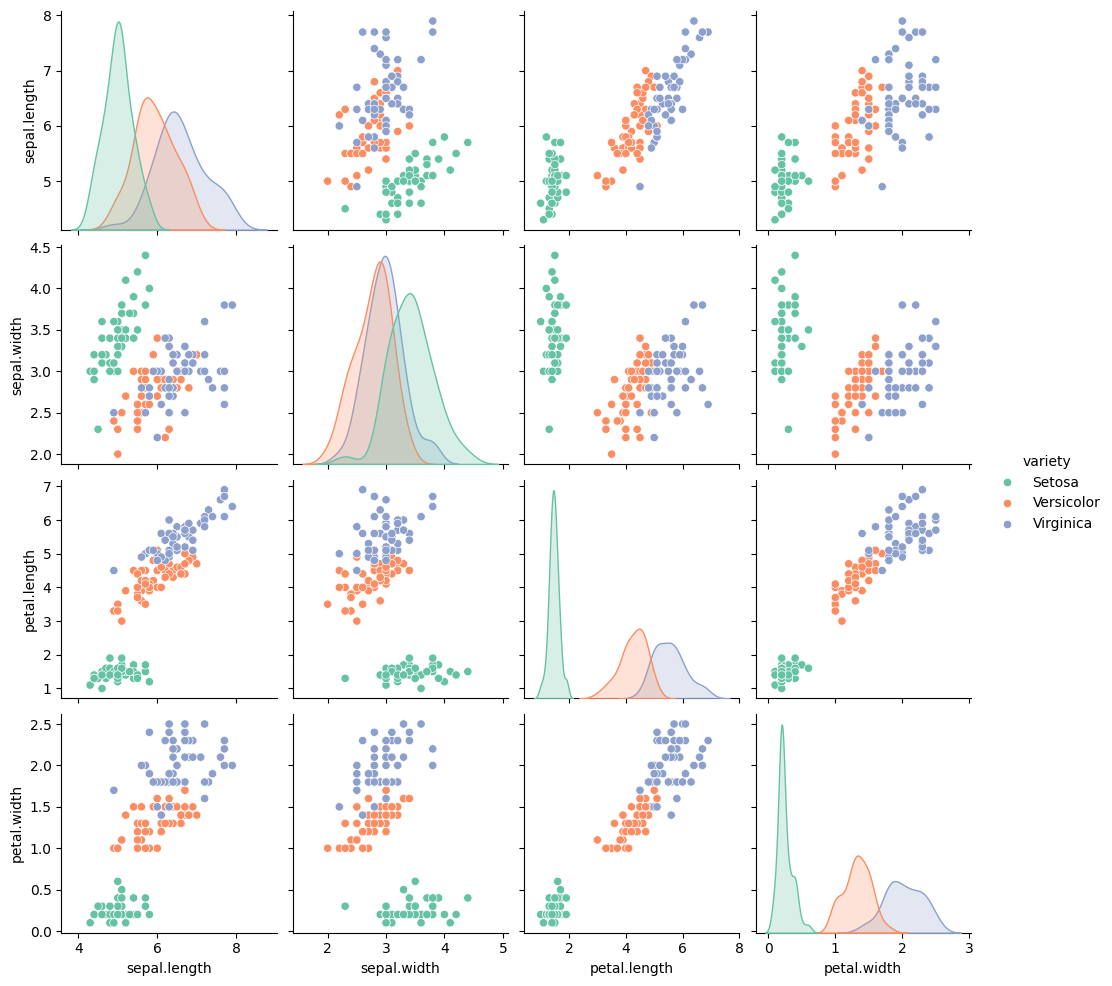

In [58]:
# Cargar el dataset desde el archivo CSV
url_2 = Ruta + "iris.csv"
df_iris = pd.read_csv(url_2)

# Verificar las primeras filas del dataframe para asegurarnos de que los datos están bien cargados
print(df_iris.head())

# --- 1. Histograms for each of the four quantitative variables ---
# Graficamos los histogramas para cada una de las variables cuantitativas
df_iris[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']].hist(figsize=(10, 8), bins=15, color='lightblue', edgecolor='black')
plt.suptitle('Histogramas de las variables cuantitativas')
plt.show()

# --- 2. Boxplots for each of the quantitative variables ---
plt.figure(figsize=(12, 8))

# Boxplot para cada variable cuantitativa
for i, column in enumerate(['sepal.length', 'sepal.width', 'petal.length', 'petal.width'], 1):
    plt.subplot(2, 2, i)  # Organizar los boxplots en una grilla 2x2
    sns.boxplot(data=df_iris, y=column, color='lightgreen')
    plt.title(f'Boxplot de {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

# --- 3. Boxplot of Petal Width grouped by Variety ---
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_iris, x='variety', y='petal.width', palette='Set2')
plt.title('Boxplot de Petal Width agrupado por tipo de flor (Variety)')
plt.xlabel('Tipo de flor')
plt.ylabel('Petal Width (cm)')
plt.show()

# --- 4. Boxplot of Sepal Length grouped by Variety ---
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_iris, x='variety', y='sepal.length', palette='Set2')
plt.title('Boxplot de Sepal Length agrupado por tipo de flor (Variety)')
plt.xlabel('Tipo de flor')
plt.ylabel('Sepal Length (cm)')
plt.show()

# --- 5. Scatterplot between Sepal Length and Sepal Width grouped by Variety ---
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_iris, x='sepal.length', y='sepal.width', hue='variety', palette='Set2')
plt.title('Dispersión entre Sepal Length y Sepal Width agrupado por tipo de flor (Variety)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()

# --- 6. Pairplot: Scatterplot of multiple variables grouped by Variety ---
sns.pairplot(df_iris[['sepal.length', 'sepal.width', 'petal.length', 'petal.width', 'variety']], hue='variety', palette='Set2')
plt.show()

**Longitud del Sépalo (Sepal Length):**
Mide el tamaño del sépalo (la parte verde que sostiene el pétalo). La mayoría de las flores tienen un sépalo de tamaño medio, entre 5 y 7 cm.

**Ancho del Sépalo (Sepal Width):**
Mide cuán ancho es el sépalo. Este valor varía un poco, pero la mayoría de las flores tienen un sépalo de unos 3 cm de ancho.

**Longitud del Pétalo (Petal Length):**
Mide el tamaño de los pétalos, que son la parte colorida de la flor. La longitud de los pétalos suele estar entre 2 y 5 cm, con algunas flores más grandes que superan los 6 cm.

**Ancho del Pétalo (Petal Width):**
Mide el grosor de los pétalos. Los valores van desde 0.1 cm hasta 2.5 cm, siendo 1 cm el valor más común.